In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

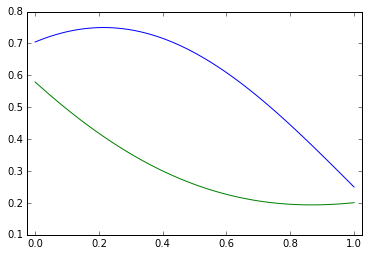

In [439]:
# data points
N = 100
x = np.linspace(0, 1, N)

# shape of the valve
y = 1.-.5*x-.5*np.sin(1.5*x+1.)
yt = .25-.5*np.sin(2.*x-2.)

f = interpolate.interp1d(x, yt, fill_value='extrapolate')

plt.plot(x, f(x))
plt.plot(x, y)
plt.axes().set_aspect('equal', 'datalim')

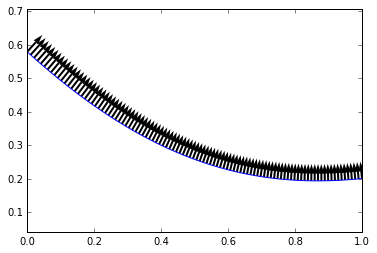

In [440]:
# get gradient of lower part
gy = np.gradient(y, x[1]-x[0])

u = -gy
v = np.full((N,),1.)

plt.quiver(x,y,u,v)
plt.plot(x,y)
plt.axes().set_aspect('equal', 'datalim')

In [451]:
from scipy.optimize import fsolve

# get line intersections
m = -1./gy
b = y - m*x
l = np.zeros(N)
for i in xrange(N):
    l[i] = fsolve(lambda x: f(x) - (m[i]*x + b[i]), 0.5)

ly = f(l)

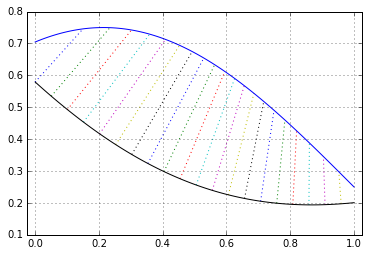

In [454]:
for i in xrange(0,100,5):
    plt.plot([x[i], l[i]], [y[i], ly[i]], ':')
    
plt.plot(x,y)
plt.plot(x,f(x))
plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')

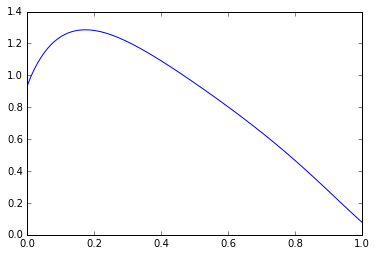

In [453]:
# get flow using conical frustum
# http://mathworld.wolfram.com/ConicalFrustum.html
flow = np.pi * (ly + y) * np.sqrt( (ly - y)**2 + (l-x)**2 )
plt.plot(x, flow)